In [ ]:
!pip install -U scikit-learn

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.manifold import TSNE

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

# Data loading

In [95]:
#f = open("./GSE123302_series_matrix.txt/GSE123302_series_matrix.txt", "r")
f = open("/content/drive/MyDrive/Laura Speggiorin - TCC/GSE123302_series_matrix.txt/GSE123302_series_matrix.txt", "r")

data = f.readlines()

header_str = data[69]
class_str = data[42]
matrix_str = data[70:-1]



In [96]:
header = header_str.replace("\"", "")
header = header.replace("\n", "")
header = header.replace("ID_REF\t", "")

header = header.split("\t")

#header
#['GSM3499537',
# 'GSM3499538',
# 'GSM3499539',
# 'GSM3499540',
# 'GSM3499541',
# ...
# 'GSM3499756',
# 'GSM3499757',
# 'GSM3499758',
# 'GSM3499759',
# 'GSM3499760']

In [97]:
classes = class_str.replace("\"", "")
classes = classes.replace("\n", "")
classes = classes.replace("!Sample_characteristics_ch1\t", "")
classes = classes.replace("diagnosis: ", "")

classes = classes.split("\t")

#classes
#['ASD',
# 'ASD',
# 'ASD',
# 'ASD',
# 'ASD',
# ...
# 'Non-TD',
# 'Non-TD',
# 'Non-TD',
# 'Non-TD',
# 'Non-TD',
# ...
# 'TD',
# 'TD',
# 'TD',
# 'TD',
# 'TD']

In [98]:
# for i in range(len(matrix_str)): matrix_str[i] = matrix_str[i].replace("\n", "")

matrix_str = [matrix_str[i].replace("\n", "") for i in range(len(matrix_str))]

header.insert(0,"ID")
df = []
string = ""
for i in range(len(matrix_str)):
  string = matrix_str[i]
  df.append(string.split("\t"))

df = pd.DataFrame(df)
df.columns = header
df.set_index('ID', inplace=True)

df

,GSM3499537,GSM3499538,GSM3499539,GSM3499540,GSM3499541,GSM3499542,GSM3499543,GSM3499544,GSM3499545,GSM3499546,...,GSM3499751,GSM3499752,GSM3499753,GSM3499754,GSM3499755,GSM3499756,GSM3499757,GSM3499758,GSM3499759,GSM3499760
ID,,,,,,,,,,,,,,,,,,,,,
16657436,6.59413,7.87068,8.24341,8.82145,7.28308,7.20000,9.23493,7.20748,7.42416,7.64885,...,7.89938,7.05351,6.51581,7.79333,8.15164,7.57387,7.53656,7.70415,7.49588,7.01858
16657440,5.93156,5.69836,5.51954,5.28161,5.78602,5.48469,5.81990,6.45421,5.99021,5.89918,...,5.89504,5.49660,4.94837,5.33726,5.31676,5.20505,5.13099,5.44787,5.49887,5.28380
16657445,3.15314,2.83453,3.95568,3.44626,3.32776,3.41798,2.64097,2.97989,3.29357,3.04085,...,3.37387,3.39238,2.42227,3.20146,2.70834,2.77802,2.93332,2.72043,2.45639,2.74394
16657447,3.65784,2.08780,2.41832,2.53530,4.08640,2.70086,2.23447,2.27813,2.21519,3.25745,...,2.62774,2.77415,2.07024,2.66232,2.26471,2.23681,2.42367,2.34175,2.62971,2.54580
16657450,11.64852,11.21240,11.29504,11.51345,11.52633,11.47545,11.52348,11.55696,11.58122,11.55579,...,10.73590,10.72824,10.30400,10.47405,10.01123,10.54521,10.68286,10.85129,10.71401,10.51731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17118442,1.95365,2.34992,2.10524,2.07298,2.13377,2.62745,1.92867,2.05897,2.21522,1.97885,...,1.93701,2.04299,2.28798,2.49042,2.53545,1.84912,2.31266,2.32737,1.81117,2.36651
17118444,3.45978,3.46852,3.83358,3.14549,3.38367,3.90132,4.14779,3.32573,4.16953,3.28960,...,2.93926,3.37738,3.19731,2.77683,3.08296,3.08644,3.61108,3.20853,3.53785,3.29566
17118446,2.80000,3.49701,2.79608,2.75074,3.52271,2.87528,2.80016,2.86922,3.18787,3.17068,...,2.86940,2.95610,2.73927,2.95253,2.69072,2.44357,2.66918,2.82318,2.50656,3.20161


In [99]:
df_t = df.transpose()
df_t.head()

ID,16657436,16657440,16657445,16657447,16657450,16657469,16657473,16657476,16657489,16657492,...,17118432,17118434,17118436,17118438,17118440,17118442,17118444,17118446,17118451,17118478
GSM3499537,6.59413,5.93156,3.15314,3.65784,11.64852,9.18746,4.59582,6.50885,5.50111,4.76784,...,6.36994,5.18167,6.14821,5.98637,3.89763,1.95365,3.45978,2.80000,3.44546,5.01391
GSM3499538,7.87068,5.69836,2.83453,2.08780,11.21240,8.69769,3.90464,6.17625,5.54039,4.40995,...,6.38951,4.71130,5.74481,6.17986,4.39488,2.34992,3.46852,3.49701,3.32475,5.10275
GSM3499539,8.24341,5.51954,3.95568,2.41832,11.29504,8.52116,3.85387,6.26045,4.82621,5.19215,...,6.06655,4.88073,5.45233,5.95467,4.39322,2.10524,3.83358,2.79608,3.43109,4.52188
GSM3499540,8.82145,5.28161,3.44626,2.53530,11.51345,8.72665,4.05922,5.95970,5.52619,4.58389,...,6.42090,5.08474,5.62217,5.78808,4.22873,2.07298,3.14549,2.75074,3.65670,5.14589
GSM3499541,7.28308,5.78602,3.32776,4.08640,11.52633,8.69042,4.29833,6.47306,4.79904,4.92781,...,6.17093,5.61961,5.27742,5.94552,3.71425,2.13377,3.38367,3.52271,3.40723,4.72626


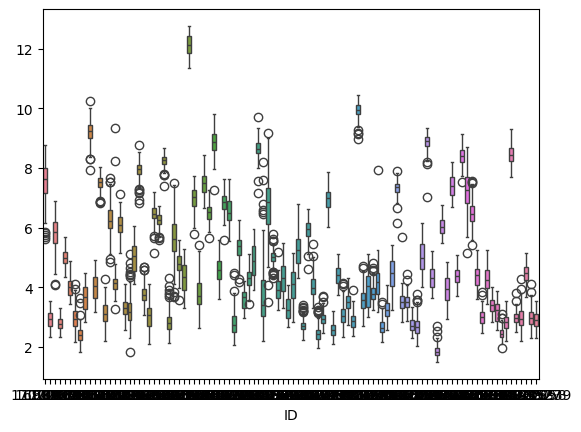

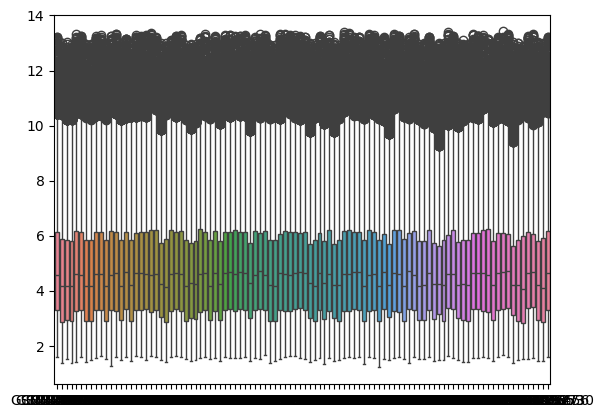

In [100]:
# plot dos atributos pre transformação
plot_df_atr = df_t.sample(100, axis='columns', random_state = 5).columns

sns.boxplot(data=df_t[plot_df_atr].astype("float64"))

#plt.ylim(0,14)

plt.show()

#plot das instancias pré transformação
plot_df_ins = df.sample(100, axis='columns', random_state = 5).columns

sns.boxplot(data=df[plot_df_ins].astype("float64"))
#plt.ylim(0,14)

plt.show()



# ------> Colocar legenda nas imagens

In [101]:
# transformação log2 por paciente (instancia)
transformed_df = np.log2(df_t.astype("float64") + 1.0)

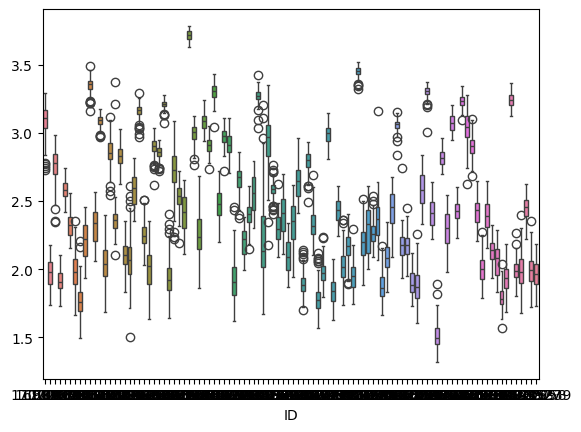

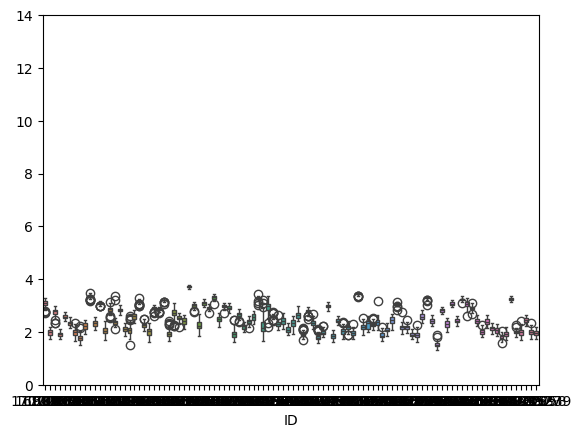

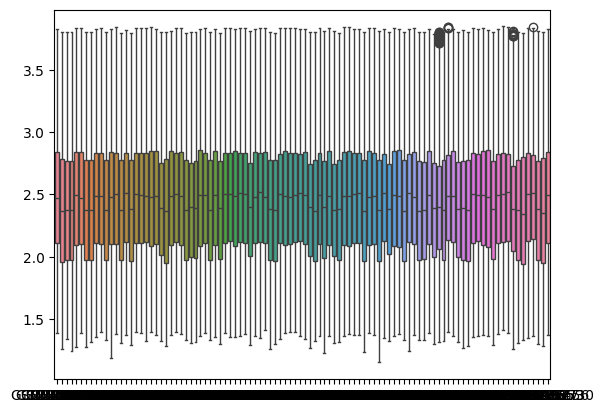

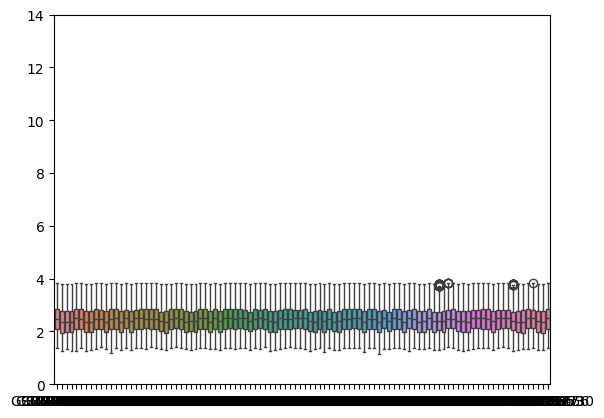

In [102]:
#plot dos atributos pós transformação
sns.boxplot(data=transformed_df[plot_df_atr].astype("float64"))
plt.show()

sns.boxplot(data=transformed_df[plot_df_atr].astype("float64"))
plt.ylim(0,14)

plt.show()

#plot das instancia pós transformação
sns.boxplot(data=transformed_df.transpose()[plot_df_ins].astype("float64"))
plt.show()

sns.boxplot(data=transformed_df.transpose()[plot_df_ins].astype("float64"))
plt.ylim(0,14)

plt.show()



# ------> Colocar legenda nas imagens 6.59413

In [ ]:
transformed_df["Class"] = classes

In [15]:
#f2 = open("./GSE123302_family.soft", "r")
f2 = open("/content/drive/MyDrive/Laura Speggiorin - TCC/GSE123302_family.soft", "r")

platform_table = []

data2 = f2.readlines()

platform_table_str = data2[309:54291]


platform_table = []
line = ""
for i in range(len(platform_table_str)):
  line = platform_table_str[i]
  platform_table.append(line.split("\t"))

platform_table = pd.DataFrame(platform_table)

platform_table.columns = platform_table.iloc[0]
platform_table = platform_table[1:]

platform_table

,ID,RANGE_STRAND,RANGE_START,RANGE_END,total_probes,GB_ACC,SPOT_ID,RANGE_GB\n
1,16657436,+,12190,13639,25,NR_046018,chr1:12190-13639,NC_000001.10\n
2,16657440,+,29554,31109,28,,chr1:29554-31109,NC_000001.10\n
3,16657445,+,69091,70008,8,,chr1:69091-70008,NC_000001.10\n
4,16657447,+,160446,161525,13,,chr1:160446-161525,NC_000001.10\n
5,16657450,+,317811,328581,36,NR_024368,chr1:317811-328581,NC_000001.10\n
...,...,...,...,...,...,...,...,...
53977,AFFX-r2-Ec-bioD-5_st,,,,,,--unknown,\n
53978,AFFX-r2-P1-cre-3_at,,,,,,--unknown,\n
53979,AFFX-r2-P1-cre-3_st,,,,,,--unknown,\n
53980,AFFX-r2-P1-cre-5_at,,,,,,--unknown,\n


In [59]:
#contagem de sondas com o prefixo NM_xxxxxx
platform_table['GB_ACC'].str.startswith('NM').value_counts()

GB_ACC
False    40731
True     13250
Name: count, dtype: int64

In [92]:
#selecionar IDs das sondas com prefixo 'NM' na coluna 'GB_ACC'
filtered_list = platform_table[platform_table['GB_ACC'].str.startswith('NM')]

filtered_list = list(filtered_list['ID'])

In [93]:
#Filtrar dataframe a partir de lista de sondas
teste = transformed_df.loc[:,[sonda for sonda in transformed_df.columns.tolist() if sonda in filtered_list]]
teste

ID,16657534,16657554,16657594,16657598,16657713,16657730,16657761,16657767,16657856,16657926,...,17117782,17117784,17117843,17117849,17117871,17117907,17117936,17118166,17118277,17118421
GSM3499537,2.652608,2.542464,2.802859,2.659313,2.661884,2.688057,3.033464,2.638414,2.779644,2.731616,...,2.655853,2.610320,2.618032,3.530282,3.194990,3.305066,2.530882,3.241704,3.710250,2.511043
GSM3499538,2.696341,2.656753,2.757269,2.675981,2.588817,2.800997,2.975709,2.663039,2.764263,2.674795,...,2.661672,2.743401,2.303716,3.602254,3.236111,3.378269,2.637712,3.303073,3.768402,2.454989
GSM3499539,2.598653,2.591988,2.763830,2.650264,2.571502,2.806512,3.009059,2.673764,2.708026,2.747166,...,2.651300,2.721060,2.643224,3.586765,3.229605,3.352427,2.684300,3.183434,3.744546,2.571521
GSM3499540,2.670170,2.606156,2.884119,2.639739,2.589509,2.719562,2.968334,2.656348,2.737397,2.730636,...,2.740822,2.631034,2.701687,3.526928,3.205105,3.321687,2.617691,3.150371,3.734816,2.372874
GSM3499541,2.574947,2.616301,2.807425,2.589879,2.613767,2.747546,2.954997,2.719059,2.775782,2.771112,...,2.604755,2.581549,2.583791,3.538959,3.213912,3.360107,2.614969,3.179812,3.746048,2.536869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3499756,2.489746,2.676771,2.721362,2.571264,2.545828,2.627560,2.912640,2.644438,2.641051,2.591581,...,2.488464,2.588222,2.758906,3.406206,3.033930,3.200864,2.496807,3.271109,3.660195,2.736384
GSM3499757,2.536652,2.592878,2.742610,2.570881,2.466940,2.662365,2.871911,2.630391,2.646029,2.615183,...,2.499450,2.509855,2.341801,3.504933,3.064279,3.312465,2.531663,3.332654,3.706199,2.614639
GSM3499758,2.677492,2.515715,2.851203,2.591313,2.540372,2.642773,2.911638,2.724246,2.772595,2.687500,...,2.553456,2.687356,2.310326,3.535023,2.982346,3.356720,2.588476,3.277951,3.730069,2.459279
GSM3499759,2.582809,2.547050,2.828126,2.553383,2.518429,2.603091,2.910740,2.706460,2.674583,2.662365,...,2.540883,2.692655,2.328584,3.531489,3.026288,3.307007,2.480953,3.217784,3.734304,2.670861


In [94]:
#filtrar por variancia (manter top 5000 "genes" que mais variam)
variance = teste.var(axis=0)
filtered_varlist = variance.rank().sort_values(ascending=False)

filtered_varlist = list(filtered_varlist[0:5000].index)

teste2 = transformed_df.loc[:,[sonda for sonda in transformed_df.columns.tolist() if sonda in filtered_varlist]]
teste2

ID,16657730,16658129,16658135,16658192,16658226,16658289,16658385,16658622,16658644,16658674,...,17117583,17117609,17117649,17117730,17117778,17117782,17117784,17117843,17117871,17118421
GSM3499537,2.688057,2.417391,2.541535,2.332914,3.022007,2.218326,2.377482,2.352064,2.942749,2.521674,...,2.685965,2.487142,2.812295,2.416232,2.610320,2.655853,2.610320,2.618032,3.194990,2.511043
GSM3499538,2.800997,2.315949,2.452366,2.279379,2.707372,2.209659,2.506549,2.378365,2.917922,2.511787,...,2.706643,2.511056,2.983472,2.559382,2.743401,2.661672,2.743401,2.303716,3.236111,2.454989
GSM3499539,2.806512,2.294068,2.468072,2.095604,2.708028,2.267023,2.606212,2.741948,2.867108,2.363036,...,2.830026,2.420170,2.947552,2.532838,2.721060,2.651300,2.721060,2.643224,3.229605,2.571521
GSM3499540,2.719562,2.369846,2.587219,2.261820,2.699258,2.250701,2.489705,2.381729,2.990619,2.628615,...,2.760268,2.446688,2.837049,2.364382,2.631034,2.740822,2.631034,2.701687,3.205105,2.372874
GSM3499541,2.747546,2.434057,2.510830,2.233934,3.047465,2.423629,2.535020,2.374759,2.909091,2.507817,...,2.760376,2.451892,2.867952,2.392576,2.581549,2.604755,2.581549,2.583791,3.213912,2.536869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3499756,2.627560,2.133481,2.337897,2.083002,2.471037,2.215710,2.224652,2.040875,2.755044,2.220175,...,2.568660,2.382067,3.026846,2.395219,2.588222,2.488464,2.588222,2.758906,3.033930,2.736384
GSM3499757,2.662365,2.061742,2.392595,2.045128,3.049209,2.218006,2.330068,2.244476,2.802168,2.160720,...,2.558035,2.246460,2.958141,2.382631,2.509855,2.499450,2.509855,2.341801,3.064279,2.614639
GSM3499758,2.642773,2.092437,2.435762,2.069798,2.920463,2.192705,2.488489,2.258983,2.711982,2.395874,...,2.561522,2.122954,2.900873,2.497745,2.687356,2.553456,2.687356,2.310326,2.982346,2.459279
GSM3499759,2.603091,2.201960,2.407059,2.110624,2.861918,2.073474,2.289407,2.238591,2.839210,2.420641,...,2.631230,2.494782,2.915989,2.443890,2.692655,2.540883,2.692655,2.328584,3.026288,2.670861


---

In [ ]:
# We want to get TSNE embedding with 2 dimensions
X = transformed_df.drop("Class", axis=1)
Y = classes

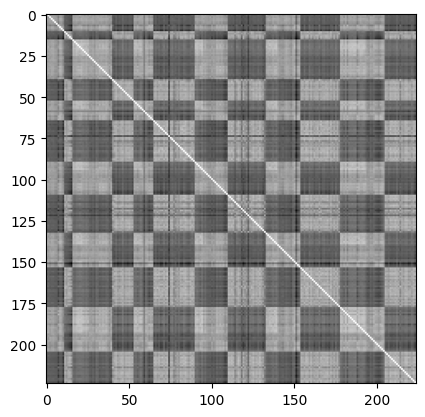

In [ ]:
from sklearn.metrics import pairwise_distances

distance_matrix = pairwise_distances(X,
                                     metric='euclidean')

plt.imshow(distance_matrix)

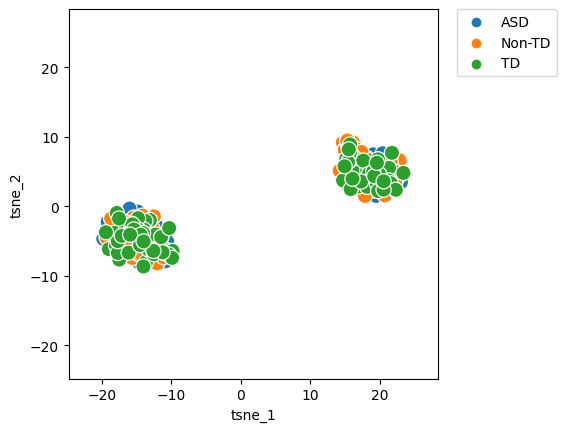

In [ ]:
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)

# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': Y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

Data pre-processing

In [ ]:
#separar por classe
#0 == desenvolvimento typico, 1 == desenvolvimento não-tipico
isTD = np.array([0 if y=='TD' else 1 for y in classes])

#0 == não TEA, 1 == TEA
isASD = np.array([1 if y=='ASD' else 0 for y in classes])

#dentro de desenvolvimento não-típico 0 == não TEA, 1 == TEA
NonTD_df = transformed_df[isTD == 1]
NonTD_isASD = np.array([1 if y=='ASD' else 0 for y in NonTD_df["Class"]])


("Nr Non-Tipical Development: " + str(len(transformed_df[isTD == 1])),
 "Nr ASD Development: " + str((len(transformed_df[isASD == 1]))))

('Nr Non-Tipical Development: 133', 'Nr ASD Development: 53')

In [ ]:
#nro de folds
K = 5

In [ ]:
#separar treino e teste
teste = StratifiedKFold(n_splits=5, random_state=3, shuffle=True)

train_folds = []
test_folds = []

for i, (train_index, test_index) in enumerate(teste.split(transformed_df, isTD, n_splits=K)):

  train_folds.append(train_index)
  test_folds.append(test_index)

#train_folds

In [ ]:
#transformar dados
scaler = MinMaxScaler()
scaler.fit(df_train)

df_train = scaler.transform(df_train)
df_test = scaler.transform(df_test)

In [ ]:
#feature selection


In [ ]:
#data augmentation?


*models*

In [ ]:
for i in range(K):
  X_train = transformed_df.iloc(train_folds[i])
  X_test = transformed_df.iloc(test_folds[i])

  Y_train = X_train["Class"]
  Y_test = X_test["Class"]

  X_train = X_train.drop["Class"]
  X_test = X_test.drop["Class"]




In [ ]:
#nayve bayes

In [ ]:
#random forest

In [ ]:
#support vector machine

Validation